# Random Forest

### Base libs importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Dataframe loading

In [2]:
df = pd.read_csv("/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Walmart_Store_sales.csv")

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

### Checking for NaNs

In [7]:
import seaborn as sns

<Axes: >

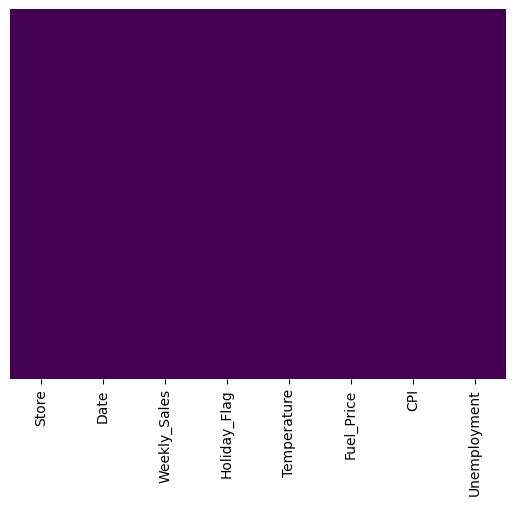

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Dropping unneeded column

In [10]:
df.drop("Date", axis=1, inplace=True)

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


### Preparing data sets for model

In [12]:
X = df.drop("Holiday_Flag", axis=1)
y = df["Holiday_Flag"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=348)

### Random Forest model import

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rand_forest = RandomForestClassifier()

In [17]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
rand_forest_pred = rand_forest.predict(X_test)

### Metrics check for Random Forest model

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print("Confusion Matrix:")
print("-----------------")
print(confusion_matrix(y_test, rand_forest_pred))
print("")
print("Classification Report:")
print("----------------------")
print(classification_report(y_test, rand_forest_pred))

Confusion Matrix:
-----------------
[[1780    5]
 [ 127   19]]

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1785
           1       0.79      0.13      0.22       146

    accuracy                           0.93      1931
   macro avg       0.86      0.56      0.59      1931
weighted avg       0.92      0.93      0.91      1931

